## In this Notebook, we aim to investigate the difference between different Dimensional reduction methods

We will be comparing the various dimesional reduction methods. The purpose of this exercise is to see if fraudulent transactions forms clusters 

1. PCA
2. TruncatedSVD\
The output of the TruncatedSVD is almost the same as PCA
3. UMAP\
The run time of UMAP is extremely slow


In [1]:
import os
os.chdir("..")

In [2]:
%load_ext autoreload
%autoreload 2

from src.cluster import generate_pca_plot, generate_truncatedSVD_plot, generate_UMAP_plot
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

c:\users\teozz\onedrive\desktop\vscode_workspace\projects\credit_card_fraud_detection\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
raw_df = pd.read_csv("data/creditcard.csv")
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Scaling Feature colums

In [4]:
feature_cols = raw_df.columns[:-1]
scaler = RobustScaler()
scaled_features =scaler.fit_transform(raw_df[feature_cols])
raw_df.loc[:, ["Amount", "Time"]] = scaler.fit_transform(raw_df[["Amount", "Time"]])

## PCA plot

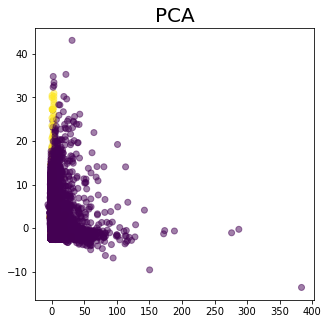

In [5]:
generate_pca_plot(raw_df[feature_cols], raw_df["Class"]);

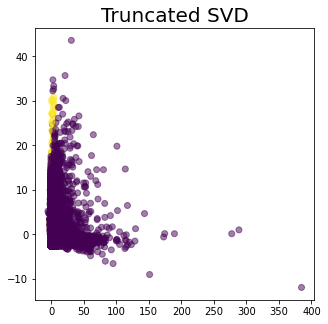

In [6]:
generate_truncatedSVD_plot(raw_df[feature_cols], raw_df["Class"])

## UMAP

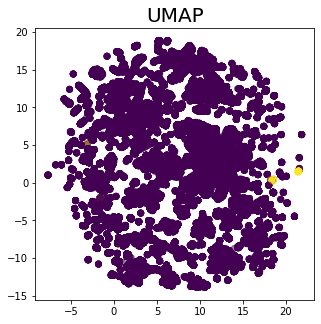

In [9]:
generate_UMAP_plot(raw_df[feature_cols], raw_df["Class"])